In [29]:
from matplotlib import pyplot as plt 
import numpy as np
from PIL import Image
import math
import time
import emoji
from cryptography.hazmat.primitives import hashes
from cryptography.fernet import Fernet
from cryptography.fernet import InvalidToken
import base64

In [30]:
digest = hashes.Hash(hashes.SHA256())
digest.update(b"passphrase")
key = base64.b64encode(digest.finalize())
f = Fernet(key)

def encrypt(msg):
  msg_enc = f.encrypt(str.encode(msg))
  return msg_enc.decode('utf-8')

def decrypt(msg):
  msg_dec = f.decrypt(str.encode(msg))
  return msg_dec.decode('utf-8')

In [31]:
def string_to_binary(msg):
  msg_bytes = ''
  msg = encrypt(msg)
  for c in msg:
    c_bin = format(ord(c), "08b")
    msg_bytes += c_bin
  return msg_bytes

def binary_to_string(msg_bytes):
  msg = ''
  for i in range(int(len(msg_bytes)/8)):
    msg += chr(int(msg_bytes[i*8:(i+1)*8], base=2))
  return decrypt(msg)

def get_length(length):
  return format(length, '064b')

def array_to_image(array):
  return Image.fromarray(np.uint8(array))

In [32]:
def cifrar(msg, im):
  msg = emoji.demojize(msg)
  assert msg.isascii(), 'Hay caracteres que no son ascii'

  img = np.array(im)
  dim = img.shape
  binary = string_to_binary(msg)
  binary = get_length(len(binary)) + binary
  # binary = string_to_binary(str(len(binary))) + binary

  assert 64 + len(binary) <= dim[0]*dim[1]*6, 'El mensaje es muy largo'

  cur = 0 
  cifrado = np.array(img, copy=True)

  for x in range(dim[0]):
    for y in range(dim[1]):
      for i in range(3): # r g b
        pixel = img[x][y][i]
        bit7 = (pixel & 0x02) == 2

        pixel_1 = pixel + 1
        bit7_1 = (pixel_1 & 0x02) == 2

        m1 = binary[cur]
        m2 = binary[cur+1]

        if bit7 == 0 and bit7_1 == 0:
          if m1 == '0' and m2 == '1':
            cifrado[x][y][i] += 1
          elif m1 == '1' and m2 == '0':
            val = 3 if (cifrado[x][y][i] == 0) else -1
            cifrado[x][y][i] += val 
          elif m1 == '1' and m2 == '1':
            cifrado[x][y][i] += 2
        elif bit7 == 0 and bit7_1 == 1:
          if m1 == '0' and m2 == '0':
            cifrado[x][y][i] -= 1
          elif m1 == '1' and m2 == '0':
            cifrado[x][y][i] += 2
          elif m1 == '1' and m2 == '1':
            cifrado[x][y][i] += 1
        elif bit7 == 1 and bit7_1 == 0:
          if m1 == '0' and m2 == '0':
            val = -3 if (cifrado[x][y][i] == 255) else 1
            cifrado[x][y][i] += val
          elif m1 == '0' and m2 == '1':
            val = -2 if (cifrado[x][y][i] == 255) else 2
            cifrado[x][y][i] += val
          elif m1 == '1' and m2 == '1':
            cifrado[x][y][i] -= 1
        elif bit7 == 1 and bit7_1 == 1:
          if m1 == '0' and m2 == '0':
            val = -2 if (cifrado[x][y][i] == 254) else 2
            cifrado[x][y][i] += val
          elif m1 == '0' and m2 == '1':
            cifrado[x][y][i] -= 1
          elif m1 == '1' and m2 == '0':
            cifrado[x][y][i] += 1

        cur += 2
        if (cur >= len(binary)):
          return cifrado

  return cifrado

In [33]:
def descifrar(im):
  img = np.array(im)
  msg = ''
  dim = img.shape
  cont = 1
  length = 0
  msg_count = 1

  for x in range(dim[0]):
    for y in range(dim[1]):
      for i in range(3):
        pixel = img[x][y][i]
        bit7 = (pixel & 0x02) == 2

        pixel_1 = pixel + 1
        bit7_1 = (pixel_1 & 0x02) == 2

        msg += f'{int(bit7)}{int(bit7_1)}'

        if msg_count == length:
          msg = binary_to_string(msg)
          return emoji.emojize(msg)

        if (cont == 32):
          length = int(msg, base=2) / 2
          msg = ''
        elif (cont > 32):
          msg_count += 1
          
        cont += 1

  msg = binary_to_string(msg)
  return emoji.emojize(msg)

In [34]:
IMAGE_PATH = 'images/tree.tiff'

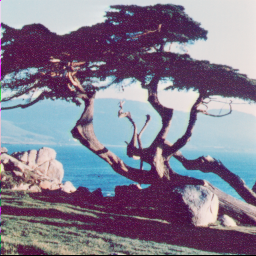

In [35]:
# Leer imagen
im = Image.open(IMAGE_PATH)
display(im)

Cifrado: 0.19237804412841797 segundos


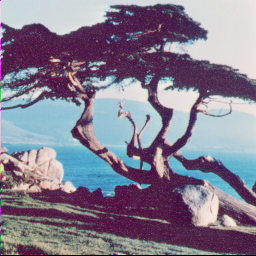

In [36]:
start = time.time()
img_cifrada = cifrar("Hola 😈😩😩😩😩😂😂😂😂😂😳😳😳😳😳👌👌👌👌👌👌👌🤔🤔🤔🤔🤔🤔🤔🤔🤔😈😈😈😈😈😈😈😈😈😈😈😊😊😊😊😊😊😊😊👆👆👆👆👆👆👆🥺🥺🥺🥺🥺🥺🥺🥺😔😔😔😔😔😔😔😔😔😎😎😎😎😎😎😎😎😎💯💯💯💯💯💯🥶🥶🥶🥶🥶🥶🥶😲😲😲😲😲😲😲😲🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏😄😄😄😄😄😄😄😄😄😄🕶🕶🕶🕶🕶🍺🍺🍺🍺🍺🍺🍺🍺🍺🍺🍺🍺", im)
img_con_mensaje = array_to_image(img_cifrada)
end = time.time()
print('Cifrado:', end-start, 'segundos')
display(img_con_mensaje)

In [37]:
start = time.time()
msg = descifrar(img_con_mensaje)
end = time.time()
print('Descifrado:', end-start, 'segundos')
print(msg)

Descifrado: 0.10004281997680664 segundos
Hola 😈😩😩😩😩😂😂😂😂😂😳😳😳😳😳👌👌👌👌👌👌👌🤔🤔🤔🤔🤔🤔🤔🤔🤔😈😈😈😈😈😈😈😈😈😈😈😊😊😊😊😊😊😊😊👆👆👆👆👆👆👆🥺🥺🥺🥺🥺🥺🥺🥺😔😔😔😔😔😔😔😔😔😎😎😎😎😎😎😎😎😎💯💯💯💯💯💯🥶🥶🥶🥶🥶🥶🥶😲😲😲😲😲😲😲😲🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏😄😄😄😄😄😄😄😄😄😄🕶️🕶️🕶️🕶️🕶️🍺🍺🍺🍺🍺🍺🍺🍺🍺🍺🍺🍺


In [38]:
try:
  test_cifrado = cifrar("Buenos dias caballero", im)
  test_mensaje = array_to_image(test_cifrado)
  assert descifrar(test_mensaje) == 'Buenos dias caballero', 'Failed'
  print('Success')
except AssertionError:
  print('Failed')

Success


In [40]:
def MSE(img, simg):
  np_img = np.array(img)
  np_simg = np.array(simg)
  dim = np_img.shape
  error = 0.0

  for x in range(dim[0]):
    for y in range(dim[1]):
      for l in range(3):
        error += (int(np_img[x][y][l]) - int(np_simg[x][y][l]))**2

  return float(error) / float(dim[0] * dim[1])

def PSNR_MSE(img, simg):
  MSE_result = MSE(img, simg)
  return 10*math.log10( (255**2) / (MSE_result) ), MSE_result

def read_messages(msgs):
  msgs_str = []
  for msg in msgs:
    with open('./messages/' + msg, 'r') as file:
      msg_str = file.read().replace('\r', '')
      msg_str = msg_str.replace('\n', '')
      msgs_str.append(msg_str)
  return msgs_str

In [44]:
imgs = ['baboon.tiff', 'clock.tiff', 'girl.tiff', 'home.tiff', 'lenna.png', 'ruler.tiff', 'grays.tiff']
msgs = read_messages(['2kb.txt', '4kb.txt', '6kb.txt', '8kb.txt', '10kb.txt'])

for msg in msgs:
  with open('results.txt', 'a') as file:
    file.write('\nImage name\t\tSize\tPSNR\t\tMSE\n')
  for img in imgs:
    im = Image.open('./images/' + img)
    im_rgb = Image.new(mode="RGB", size=im.size)
    im_rgb.paste(im)
    img_cifrada = cifrar(msg, im_rgb)
    img_con_mensaje = array_to_image(img_cifrada)
    descifrar(img_con_mensaje)
    PSNR_result, MSE_result = PSNR_MSE(im_rgb, img_con_mensaje)
    with open('results.txt', 'a') as file:
      file.write(f'{img}\t\t{len(msg)}\t{round(PSNR_result, 4)}\t\t{round(MSE_result, 4)}\n')